<h1>Top 500 Músicas de todos os tempos</h1>
<br>
Dataset disponível no <a href='https://www.kaggle.com/omarhanyy/500-greatest-songs-of-all-time?select=Top+500+Songs.csv'>Kaggle</a>
<br>
Este dataset possui informações das 500 melhores escolhas feitas pela revista Rolling Stones como as melhores músicas de todos os tempos. Rolling Stone é uma revista mensal americana que se concentra na cultura popular.
<br>
<br>
As perguntas que queremos responder é: Quais artistas possuem o maior número de músicas nas 500 melhores músicas? Qual artista ficou mais tempo em primeiro lugar das músicas mais tocadas? Quais músicas ficaram mais tempo no topo das mais tocadas? 

Vamos <b>primeiro</b> importar as bibliotecas que nos ajudará na exploração e visualização dos dados. Vamos, também, abrir o arquivo e visualizar as primeiras 5 linhas. Além disso, vamos explorar nosso conjunto de dados.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Lendo o arquivo
top_musicas = pd.read_csv('Top 500 Songs.csv', encoding='ISO-8859-1 ')

In [3]:
# Primeiras 5 linhas do DataFrame
top_musicas.head()

,title,description,appears on,artist,writers,producer,released,streak,position
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,"July, 1965",12 weeks,No. 2
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,"May, 1965",14 weeks,No. 1
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono","October, 1971",9 weeks,No. 3
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,"Feb, 1971",13 weeks,No. 2
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,"April, 1967",12 weeks,No. 1


In [4]:
# Quantidade de linhas e colunas do DataFrame
top_musicas.shape

(500, 9)

In [5]:
# Informações sobre o tipo de dado de cada coluna
top_musicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        500 non-null    object
 1   description  500 non-null    object
 2   appears on   500 non-null    object
 3   artist       500 non-null    object
 4   writers      500 non-null    object
 5   producer     500 non-null    object
 6   released     500 non-null    object
 7   streak       494 non-null    object
 8   position     393 non-null    object
dtypes: object(9)
memory usage: 35.3+ KB


In [6]:
# Estatísticas resumidas de todas as colunas
top_musicas.describe().T

,count,unique,top,freq
title,500,446,Crazy,4
description,500,450,"With Lewis pounding the piano and leering, ""Gr...",2
appears on,500,392,The Ultimate Collection (Motown),10
artist,500,248,The Beatles,23
writers,500,335,"John Lennon, Paul McCartney",20
producer,500,296,George Martin,21
released,500,331,"Oct. , 1969",7
streak,494,54,Did not chart,35
position,393,100,No. 1,76


In [7]:
# Nome das colunas do DataFrame
top_musicas.columns

Index(['title', 'description', 'appears on', 'artist', 'writers', 'producer',
       'released', 'streak', 'position'],
      dtype='object')

<h1><b>Entendendo os nossos dados</b></h1>

O conjunto de dados possui colunas que descrevem as músicas como um todo, como o título da música, descrição da canção, onde apareceu, artista(s) que cantou(cantaram) a música, compositores, produtores, data de lançamento, quanto tempo ficou no topo da lista e qual era a posição dele durante a sequência.
<br>
Vamos alterar o nome das colunas para o português, para ficarmos mais familiarizados. O único que não vamos traduzir é a coluna 'Streak', pois manter a palavra é mais simples do que traduzi-la.

In [8]:
# Alterando o nome das colunas para ficar em português
top_musicas.columns = ['Titulo', 'Descrição', 'Onde apareceu', 'Artista', 'Compositor', 'Produtor', 'Lançamento', 'Streak', 'Posição']

<h1><b>Limpeza dos dados</b></h1>
<br>
Para podermos fazer uma análise mais correta possível, devemos limpar os dados. Durante nossa exploração dos dados, quando tiramos a informação de cada coluna, foi visto que o conjunto de dados possui 500 linhas não nulas, como esperado, porém na coluna 'streak', há 6 linhas com valor nulo. Em vez de jogarmos fora essas linhas com valores nulos, vamos substituir estes valores por uma string 'Vazio', para mantermos as 500 linhas do Dataset.
<br>
<br>
Vamos verificar também se há linhas duplicadas, para ver se há realmente 500 linhas com músicas diferentes. Como será demonstrado, não há essas 500 músicas, mas como ainda é um valor de 450 valores únicos, a análise será interessante de qualquer forma. Vamos excluir estas linhas duplicadas, para não interferir na nossa análise.

In [9]:
# Verificando colunas com valores nulos
top_musicas.isnull().sum()

Titulo             0
Descrição          0
Onde apareceu      0
Artista            0
Compositor         0
Produtor           0
Lançamento         0
Streak             6
Posição          107
dtype: int64

In [10]:
# Trocando valores nulos por um valor padrão
top_musicas.fillna('Vazio', inplace=True)

In [11]:
# Verificando se ainda há valores nulos
top_musicas.isnull().sum()

Titulo           0
Descrição        0
Onde apareceu    0
Artista          0
Compositor       0
Produtor         0
Lançamento       0
Streak           0
Posição          0
dtype: int64

In [12]:
# Verificando se há linhas duplicadas
top_musicas.duplicated().sum()

50

In [13]:
# Excluíndo valores duplicados
top_musicas.drop_duplicates(inplace=True)

In [14]:
# Verificando se ainda há linhas duplicadas
top_musicas.duplicated().sum()

0

<h1><b>Primeira pergunta</b></h1>
<br>
Quais artistas possuem o maior número de músicas nas 500 melhores músicas?
<br>
<br>
O artista com maior número de músicas são The Beatles com 20 músicas, seguido um pouco de longe, com 12 músicas por Bob Dylan. Em terceiro aparecem empatados com 10 músicas, Elvis Presley e The Rolling Stones.

In [15]:
pergunta1 = top_musicas.groupby('Artista')['Titulo'].count().sort_values(ascending=False).head(10)
pergunta1

Artista
The Beatles                    20
Bob Dylan                      12
Elvis Presley                  10
The Rolling Stones             10
U2                              7
The Beach Boys                  7
The Jimi Hendrix Experience     6
Chuck Berry                     5
Led Zeppelin                    5
Ray Charles                     5
Name: Titulo, dtype: int64

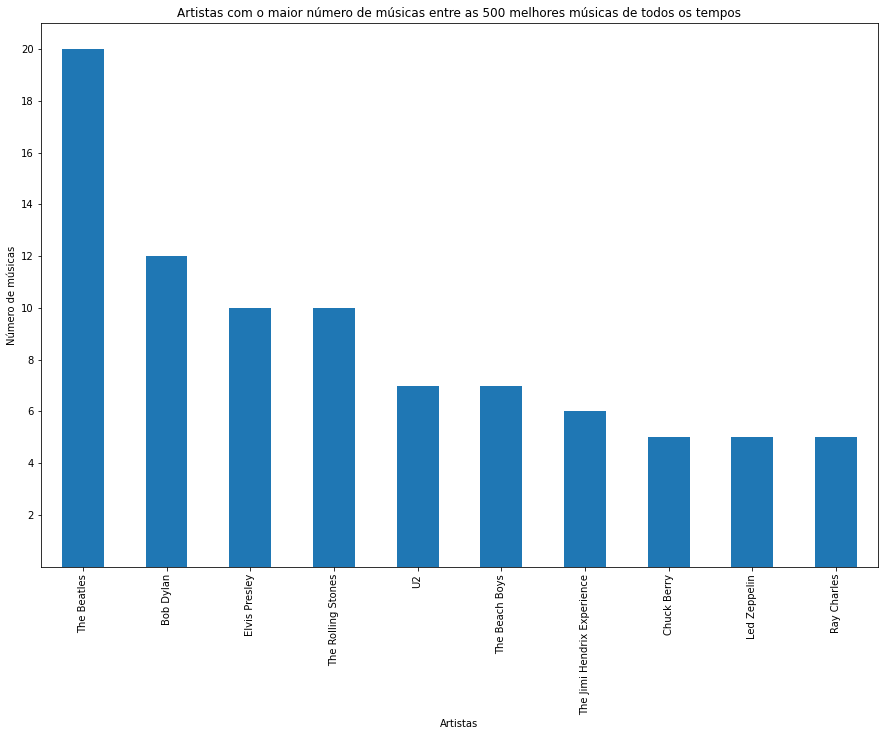

In [16]:
plt.figure(figsize=(15,10))
pergunta1.plot(kind='bar')
plt.title('Artistas com o maior número de músicas entre as 500 melhores músicas de todos os tempos')
plt.xlabel('Artistas')
plt.ylabel('Número de músicas')
plt.yticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.show()

<h1><b>Segunda pergunta</b></h1>
<br>
Qual artista ficou mais tempo em primeiro lugar das músicas mais tocadas?


In [17]:
pergunta2 = top_musicas.groupby('Posição')['Artista'].count().sort_values(ascending=False).head(10)
pergunta2

Posição
Vazio      94
 No. 1     67
No. 1      30
 No. 2     21
 No. 3     13
 No. 10     9
 No. 8      9
 No. 12     9
 No. 7      9
 No. 6      8
Name: Artista, dtype: int64

<b>Percebe-se que há algum ruído na coluna Posição, que aparece o 'No. 1' duas vezes, provavelmente por causa do uso de espaço. Vamos resolver isto.</b>

In [18]:
# Removendo espaços 
top_musicas['Posição'] = top_musicas['Posição'].str.lstrip()

In [19]:
# Executando novamente o groupby para verificar se o problema foi resolvido
posicoes = top_musicas.groupby('Posição')['Artista'].count().sort_values(ascending=False).head(10)
posicoes

Posição
No. 1     97
Vazio     94
No. 2     27
No. 3     18
No. 10    11
No. 6     11
No. 8     11
No. 12    10
No. 7     10
No. 4      9
Name: Artista, dtype: int64

In [30]:
tempo = top_musicas.groupby('Streak')['Artista']
tempo.count()

Streak
 21 weeks                  1
1 week                     1
10 weeks                  12
11 weeks                  31
12 weeks                  26
13 weeks                  28
13 weeks, No. 6            1
14 weeks                  31
15 weeks                  29
15 weeks, No. 7            1
16 weeks                  29
17 weeks                  15
18 weeks                  10
19 weeks                  13
2 weeks                    2
20 weeks                  15
21 weeks                  15
22 weeks                   7
23 weeks                   2
24 weeks                   8
25 weeks                   7
26 weeks                   5
27 weeks                  10
27 weeks, No. 1            1
28 weeks                   2
29 weeks                   1
3 weeks                    1
30 weeks                   2
31 weeks                   1
32 weeks                   1
33 weeks                   2
39 weeks                   1
4 weeks                    4
42 weeks                   1
46 week

<b>O maior tempo seguido registrado no conjunto de dados foi 46 semanas, porém não foi na primeira colocação. O Artista que ficou mais tempo na primeira colocação foi Chubby Checker, com o título 'The Twist', com 39 semanas.</b>

In [33]:
# Filtrando o conjunto de dados para responder a segunda pergunta
primeira_posicao = top_musicas[top_musicas['Posição'] == 'No. 1']
primeira_posicao[primeira_posicao['Streak'] == '39 weeks']

,Titulo,Descrição,Onde apareceu,Artista,Compositor,Produtor,Lançamento,Streak,Posição
493,The Twist,"""The Twist"" began as a B side for Ballard and ...",Greatest Hits (Prime Cuts),Chubby Checker,Hank Ballard,Karl Mann,"Aug. , 1960",39 weeks,No. 1


<h1><b>Terceira pergunta</b></h1>
<br>
Quais músicas ficaram mais tempo no topo das mais tocadas?
<br>
<br>
Como visto na pergunta anterior, o maior tempo seguido registrado no conjunto de dados foi <b>46 semanas pelo artista Kelly Clarkson, com o título 'Since U Been Gone'.</b>

In [35]:
# Filtrando o conjunto de dados para responder a terceira pergunta
musica_maior_tempo = top_musicas[top_musicas['Streak'] == '46 weeks']
musica_maior_tempo

,Titulo,Descrição,Onde apareceu,Artista,Compositor,Produtor,Lançamento,Streak,Posição
468,Since U Been Gone,"Pop gurus Max Martin and Lukasz ""Dr. Luke"" Got...",Breakaway (RCA),Kelly Clarkson,"Dr. Luke, Max Martin","Dr. Luke, Martin","Nov. , 2004",46 weeks,No. 2
